[Reference](https://ckraczkowsky.medium.com/eeg-data-loading-cleaning-pipeline-dfc3ebc0b927)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 10.8 MB/s eta 0:00:00
Using default location ~/mne_data for sample...
Creating /root/mne_data


100%|█████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 1.79TB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Could not read the /root/.mne/mne-python.json json file during the writing. Assuming it is empty. Got: Expecting value: line 1 column 1 (char 0)
Download complete in 03m30s (1576.2 MB)
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 18018  =      0.000 ...   119.997 secs...
RAW DATA <Info | 15 non-empty values
 bads: 1 items (EEG 053)
 ch_names: MEG 0111, MEG 0121, MEG 0131, MEG 0141, MEG 0211, MEG 0221, MEG ...
 chs: 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items 

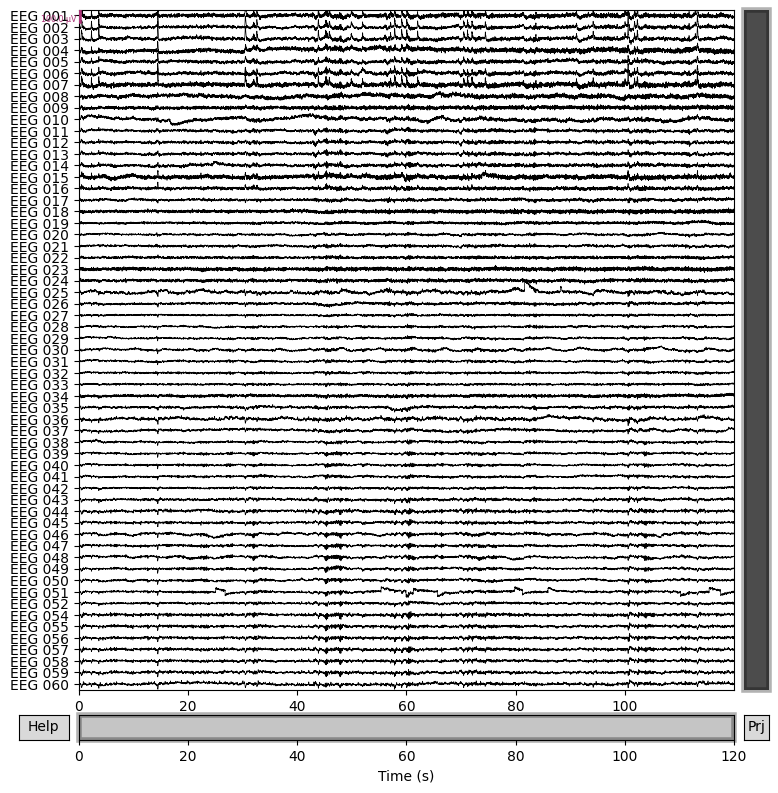

Effective window size : 13.639 (s)
Plotting power spectral density (dB=True).
Using EOG channel: EOG 061
EOG channel index for this subject is: [171]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG 061 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1502 samples (10.003 s)

Now detecting blinks and generating corresponding events
Found 18 significant peaks
Number of EOG events detected: 18
Not setting metadata
18 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension 

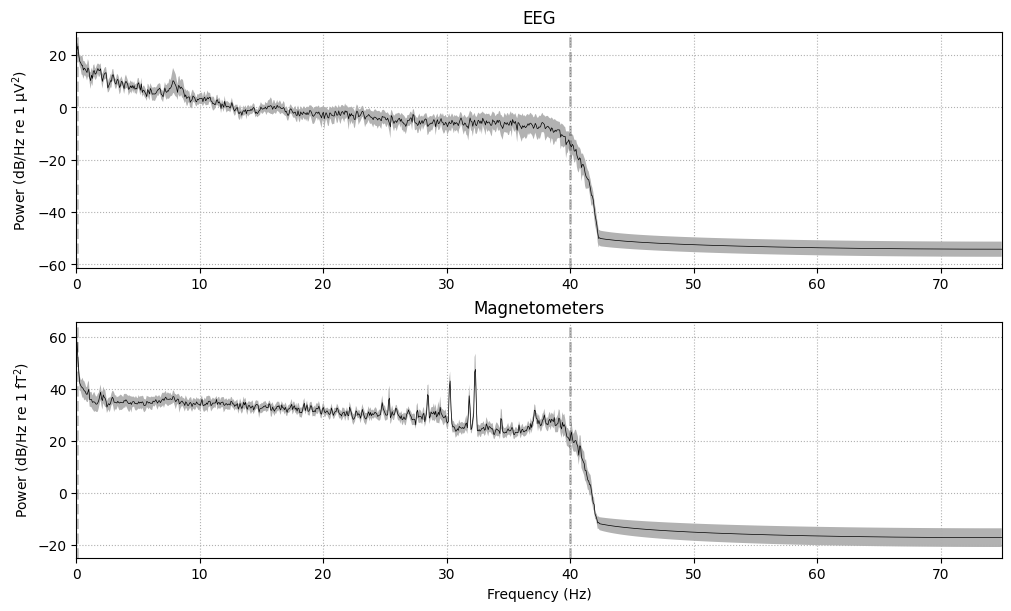

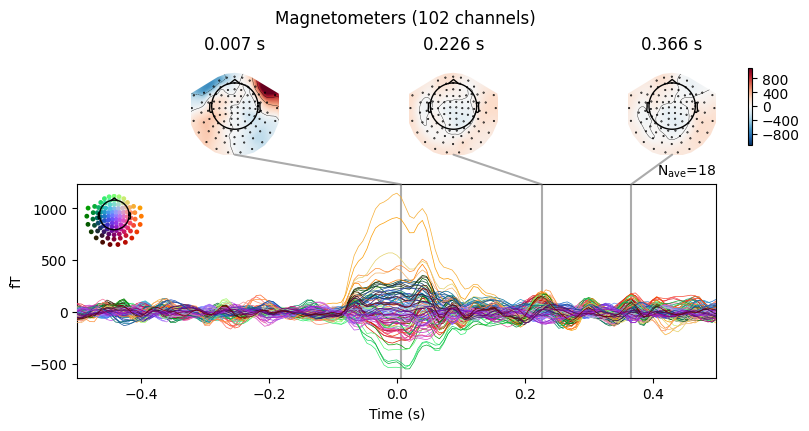

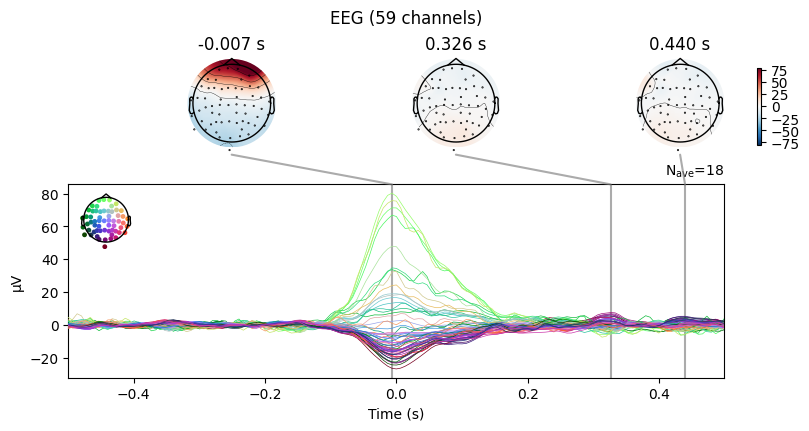

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 1502 samples (10.003 s)

Number of ECG events detected : 118 (average pulse 58.9981981638739 / min.)
Not setting metadata
118 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 4)
Using data from preloaded Raw for 118 events and 151 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
SSP projectors applied...


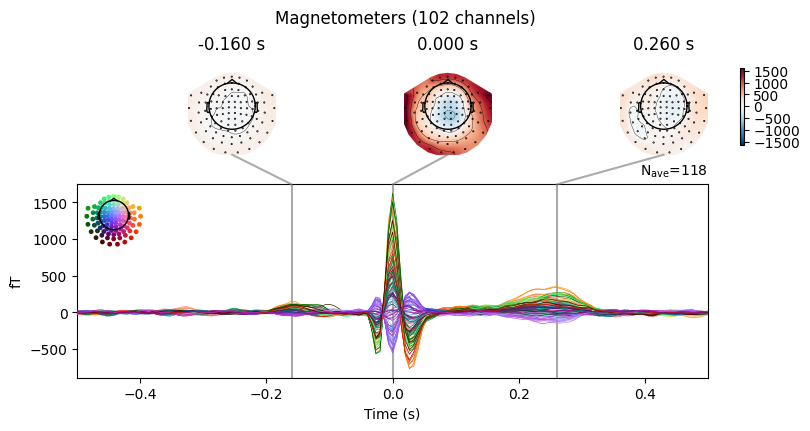

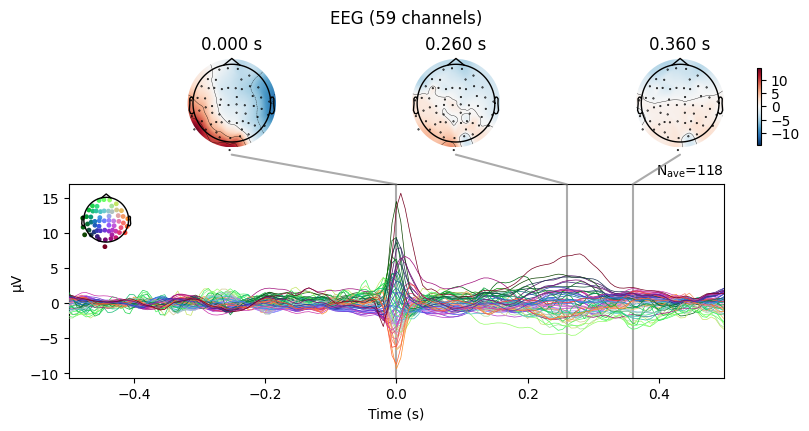

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 497 samples (3.310 s)



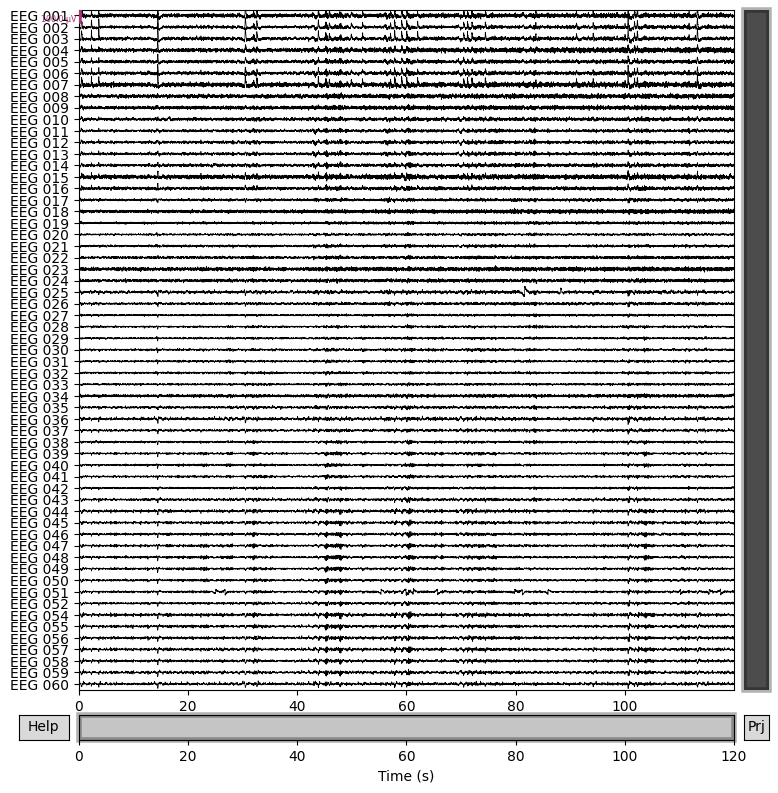

Fitting ICA to data using 161 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 3.0s.
Creating RawArray with float64 data, n_channels=16, n_times=18019
    Range : 6450 ... 24468 =     42.956 ...   162.953 secs
Ready.


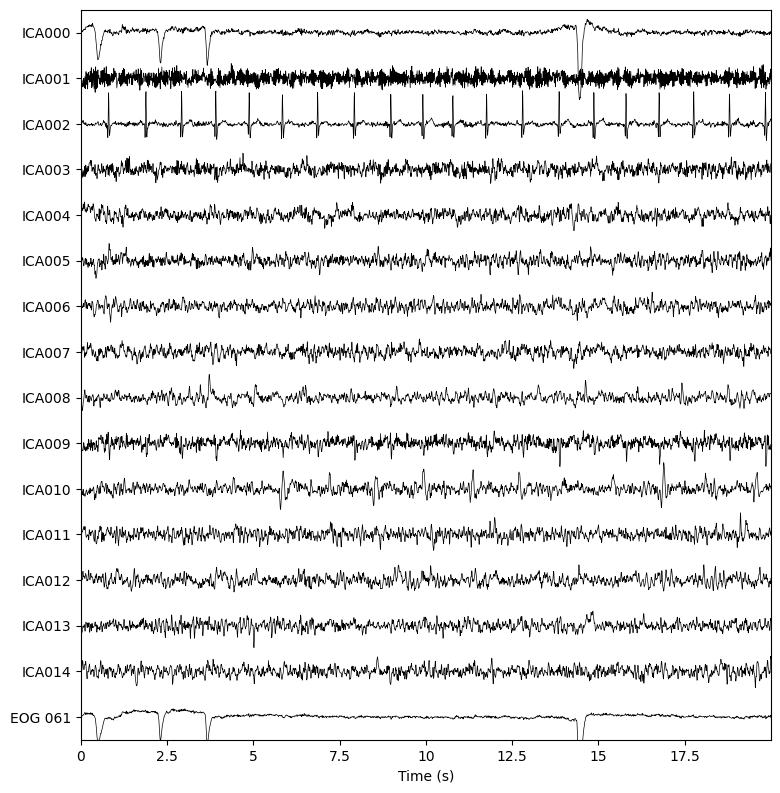

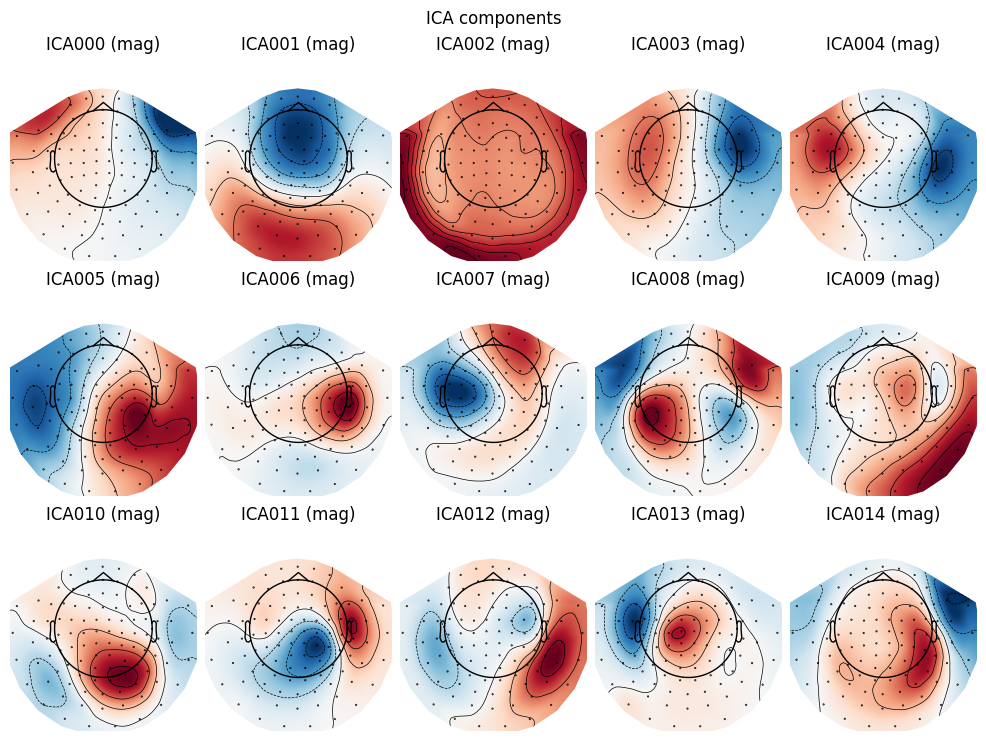

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 161 PCA components


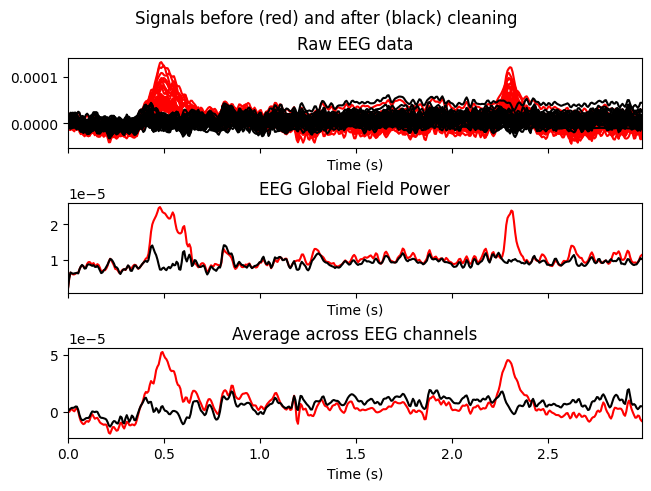

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 161 PCA components


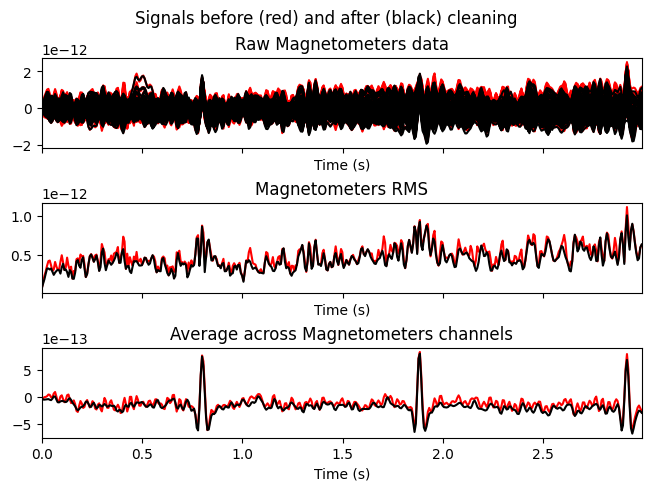

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 161 PCA components


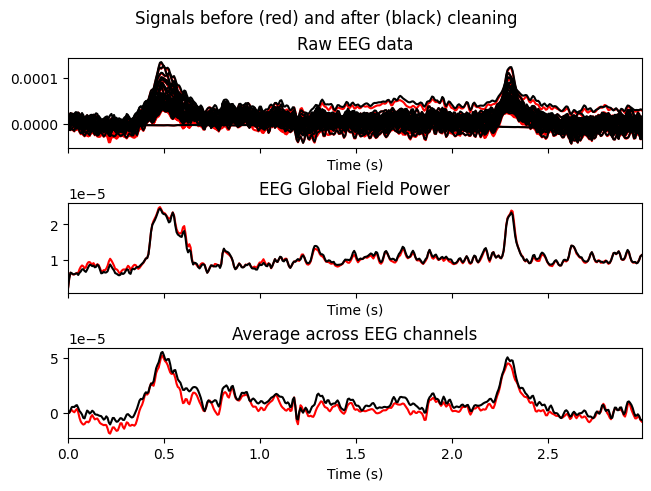

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 161 PCA components


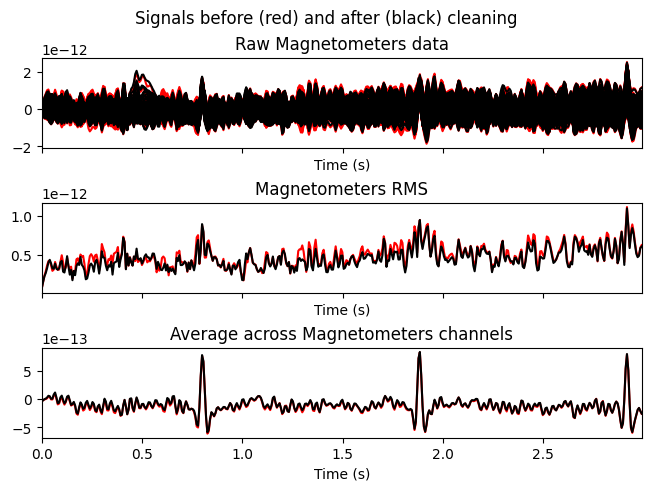

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 161 PCA components


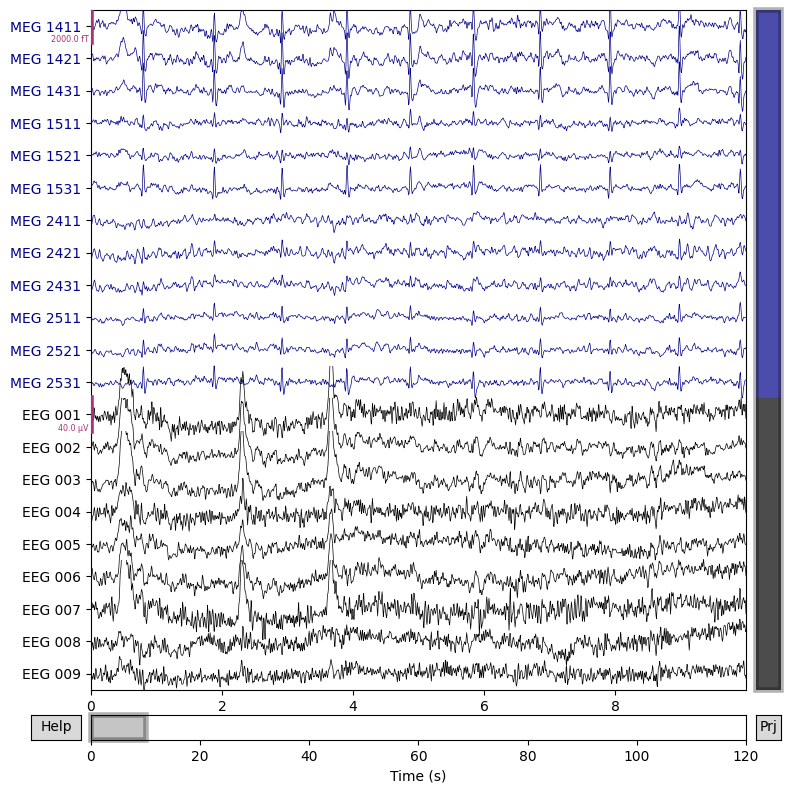

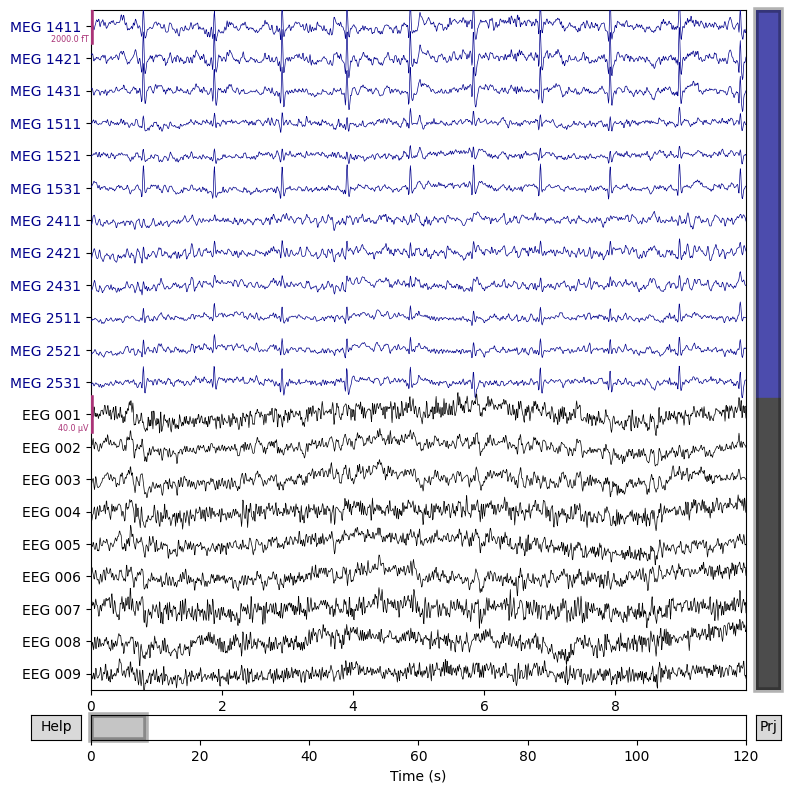

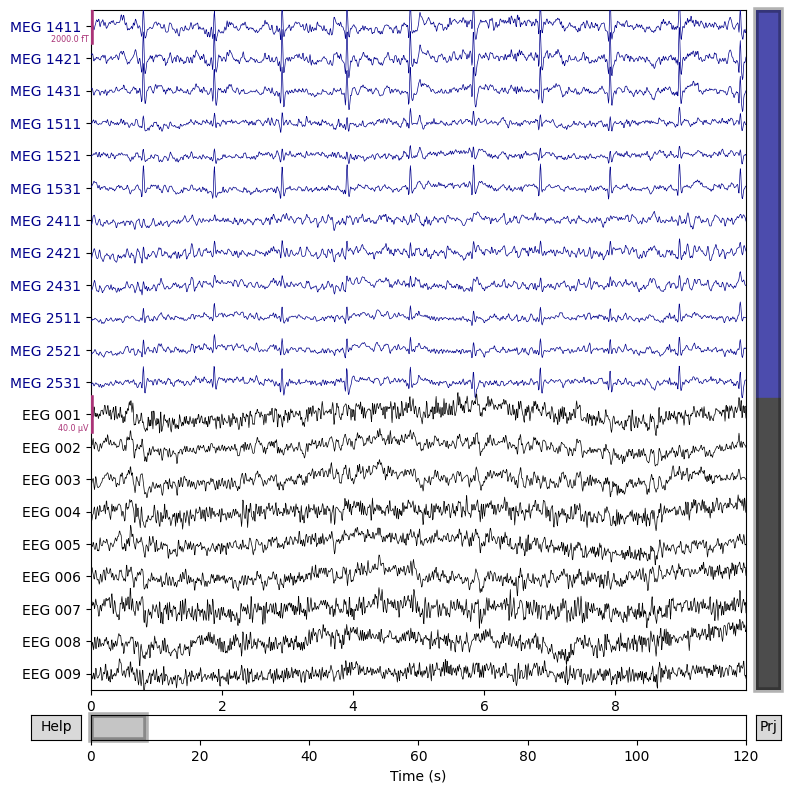

In [1]:
import os

!pip install mne
import mne
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(
    sample_data_folder, "MEG", "sample", "sample_audvis_filt-0-40_raw.fif"
)
raw = mne.io.read_raw_fif(sample_data_raw_file)

# Here we'll crop to 60 seconds and drop gradiometer channels for speed
raw.crop(tmax=120.0).pick(picks=["mag", "eeg", "stim", "eog"])
raw.load_data()
print('RAW DATA', raw.info)

mag_channels = mne.pick_types(raw.info, meg='mag')
eeg_channels = mne.pick_types(raw.info, eeg=True)

### Observe the raw data

## Detect low-drift frequencies using amplitude plot
raw.plot(picks=eeg_channels, n_channels=len(eeg_channels),
         start=0, duration=120, scalings={'eeg': 50e-6})

## Detect power line noise using PSD plot
raw.compute_psd(fmax=75).plot(
    average=True, amplitude=False, picks="data", exclude="bads"
)


## Observe potential EOG artifacts (e.g. eye blink) or ECG artifact (e.g. heartbeat)
regexp = r"(MEG [12][45][123]1|EEG 00.)"
artifact_picks = mne.pick_channels_regexp(raw.ch_names, regexp=regexp)

## Observe EOG artifacts
eog_evoked = create_eog_epochs(raw).average()             #Use one of the functions imported from mne to create epochs which automatically detects ocular events and creates epochs around them, then compute an average over the epochs to show an example of an eye blink in the data, returns Evoked
eog_evoked.apply_baseline(baseline=(None, -0.2))          #Want to apply baseline to smooth peaks. Epochs are -0.5 and 0.5 seconds from the identified ocular movement, grab the baseline just before the eye movement starts (-0.2 before event) to not include the event
eog_evoked.plot_joint()                                   #Plot evoked data as butterfly plot and add topomaps for time points, we should see spikes in the butterfly plot that correspond to activity around the frontal lobe

## Observe ECG artifacts
ecg_evoked = create_ecg_epochs(raw).average()
ecg_evoked.apply_baseline(baseline=(None, -0.2))
ecg_evoked.plot_joint()

### Pre-filter data (apply band-pass + notch filtering

## Apply filter
filtered_raw = raw.copy().filter(l_freq=1.0, h_freq=None)

## Validate low-frequency drift smoothing
filtered_raw.plot(picks=eeg_channels, n_channels=len(eeg_channels),
         start=0, duration=120, scalings={'eeg': 50e-6})


### Run ICA to create an ICA object
ica = ICA(n_components=15, max_iter="auto", random_state=97)
ica.fit(filtered_raw)

## Identify artifacts from components
ica.plot_sources(filtered_raw, show_scrollbars=False)
ica.plot_components()

ica.plot_overlay(raw, exclude=[0], picks='eeg') # Look at the raw original data against the cleaned dat (ICA000 removed) applied to just the EEG channels
ica.plot_overlay(raw, exclude=[1], picks='mag')

ica.plot_overlay(raw, exclude=[4], picks='eeg')
ica.plot_overlay(raw, exclude=[4], picks='mag')

### Clean the raw data
ica.exclude = [0, 1]

raw_copy = raw.copy()
ica.apply(raw_copy)                             # apply the ICA analysis to the raw data

## Validate cleaning
raw.plot(order=artifact_picks, n_channels=len(artifact_picks))                                      # see the plot of the original data looking at the subset of channels that we looked at at the beginning
raw_copy.plot(order=artifact_picks, n_channels=len(artifact_picks))                                 # see the plot of the cleaned data